# Part 1

## Imports

In [51]:
%config Completer.use_jedi = False

In [52]:
!pip install textblob 
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import re
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /home/rudra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rudra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rudra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rudra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Handling the Dataset

In this part I have cleaned the dataset by removing unwanted columns, removing punctuation marks in the tweetcaption column and using only relevant words for sentiment analysis.

In [53]:
data = pd.read_csv('dataset.csv')
data.head()

Unnamed: 0                         Data       Date     Time  \
0           0                 tuesdayvibes  7/14/2020  7:00:21   
1           1                    realmeC11  7/14/2020  7:00:21   
2           2                  KPSharmaOli  7/14/2020  7:00:21   
3           3              RheaChakraborty  7/14/2020  7:00:21   
4           4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  
0  Love it here vacation vibes amazing beautiful ...  
1  Best Camera Smartphone under 20k Please vote a...  
2  shree Why should we have a problem with the pe...  
3  Rhea Chakraborty s Heartbreaking Post On Susha...  
4  We stand for Sunita Yadav Stop the Transfer Wh...

In [54]:
my_data = data.drop('Unnamed: 0', axis=1) #removing the unwanted cloumn(s)
my_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  
0  Love it here vacation vibes amazing beautiful ...  
1  Best Camera Smartphone under 20k Please vote a...  
2  shree Why should we have a problem with the pe...  
3  Rhea Chakraborty s Heartbreaking Post On Susha...  
4  We stand for Sunita Yadav Stop the Transfer Wh...

In [55]:
def clean(txt):
# Removing all special characters and numericals leaving the alphabets
    txt = re.sub('[^A-Za-z]+', ' ', txt)
    return txt

# Cleaning the text in the tweetcaption column
my_data['cleaned_tweetcaption'] = my_data['tweetcaption'].apply(clean)
my_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                cleaned_tweetcaption  
0  Love it here vacation vibes amazing beautiful ...  
1  Best Camera Smartphone under k Please vote and...  
2  shree Why should we have a problem with the pe...  
3  Rhea Chakraborty s Heartbreaking Post On Susha...  
4  We stand for Sunita Yadav Stop the Transfer Wh...

In [56]:
def checkKey(dict, key):

    if key in dict.keys(): return True
    else: return False

In [57]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
hsh={}
def token_stop_pos(text):
    if(checkKey(hsh,text)): return hsh[text]
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    hsh[text]=newlist
    return newlist

# df['POS tagged'] = df.groupby('Cleaned Tweetcaptions')['Cleaned Tweetcaptions'].transform(token_stop_pos)
my_data['POS_tagged'] = my_data['cleaned_tweetcaption'].apply(token_stop_pos)
my_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                cleaned_tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under k Please vote and...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                          POS_tagged  
0  [(Love, v), (vacation, n), (vibes, n), (amazin...  
1  [(Best, n), (Camera, n), (Smartphone, n), (k, ...  
2  [(shree, a), (problem, n), (people, n), (probl...  
3  [(Rhea, n), (Chakraborty, n), (Heartbreaking, ...  
4  [(stand, v), (Sunita, n), (Yadav, n), (Stop, n...

In [58]:
#using the pos_tagged column data to create a lemma column conatining relevant words
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

my_data['Lemma'] = my_data['POS_tagged'].apply(lemmatize)
my_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                cleaned_tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under k Please vote and...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                          POS_tagged  \
0  [(Love, v), (vacation, n), (vibes, n), (amazin...   
1  [(Best, n), (Camera, n), (Smartphone, n), (k, ...   
2  [(shree, a), (problem, n), (people, n), (probl...   
3  [(Rhea, n), (Chakraborty, n), (Heartbreaking, ...   
4  [(stand, v), (Sunita, n), (Yadav, n), (Stop, n...   

                                               Lemma  
0    Love vacation vibe amaze beautiful cabo mexi...  
1    Best Camera Smartphone k Please vote help re...  
2    shree problem people problem Stupid Communis...  
3    Rhea Chakraborty Heartbreaking Post Sushant ...  
4    stand Sunita Yadav Stop Transfer woman empow...

## Building Functions

### Using Rule Based Method- TextBlob

TextBlob calculates the polarity and subjectivity of a tweet and based on the polarity we judge whether a tweet is in positive, negative or neutral context.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
So low subjectivity refers to a facual information whereas a high value refers to a public opinion.

In [59]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    else:
        return 'Positive'

In [60]:
blob_data = pd.DataFrame(my_data[['tweetcaption', 'Lemma']])

In [61]:
blob_data['Subjectivity'] = blob_data['Lemma'].apply(getSubjectivity) 
blob_data['Polarity'] = blob_data['Lemma'].apply(getPolarity) 
blob_data['Analysis'] = blob_data['Polarity'].apply(analysis)
blob_data.head()

tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                               Lemma  Subjectivity  Polarity  \
0    Love vacation vibe amaze beautiful cabo mexi...      0.478571  0.142695   
1    Best Camera Smartphone k Please vote help re...      0.445174  0.200033   
2    shree problem people problem Stupid Communis...      0.638750  0.118750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...      0.607143  0.142857   
4    stand Sunita Yadav Stop Transfer woman empow...      0.515079  0.213228   

   Analysis  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [62]:
tb_counts = blob_data.Analysis.value_counts()

tb_counts

Positive    29591
Negative     5675
Name: Analysis, dtype: int64

We can see that we have a higher number of positive tweets in the dataset.

### Using Machine Learning Approach- Naive Bayes

In this section I have taken naive bayes model trained on a different dataset of tweets and I have applied it on my dataset. The pretrained model had a accuracy of 73% on that dataset and I have used it to predict the sentiment on our dataset.
I have modified the model to fit our dataset.

Please download the [dataset](https://www.kaggle.com/githubsearch/twitter-sentimental-analysis/data) for the below pretrained naive bayes model.

#### The code for the pretrained model:

In [63]:

tweets=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', 
                   names = ['sentiment','id','date','query','user','tweet'])
tweets

sentiment          id                          date     query  \
0                0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599995          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                              tweet  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1          scotthamilton  is upset that he can't update his Facebook by ...  
2               mattycus  @Kenichan I dived many times for the ball. Man...  
3                ElleCTF    my whole body feels itchy and like its on fire   
4                 Karoli  @nationwideclass no, it's not behaving at all....  
...                  ...                                                ...  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1600000 rows x 6 columns]

In [64]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (200000, 6)


In [65]:
tweets['sentiment']=tweets['sentiment'].replace(4,1)
tweets

sentiment          id                          date     query  \
47839            0  1677728409  Sat May 02 03:39:41 PDT 2009  NO_QUERY   
633888           0  2233145331  Thu Jun 18 20:53:57 PDT 2009  NO_QUERY   
1212394          1  1989247277  Mon Jun 01 00:51:33 PDT 2009  NO_QUERY   
1237846          1  1993122038  Mon Jun 01 09:52:03 PDT 2009  NO_QUERY   
83476            0  1753356528  Sun May 10 01:14:26 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1088137          1  1969504840  Sat May 30 00:14:53 PDT 2009  NO_QUERY   
281886           0  1992456765  Mon Jun 01 08:47:02 PDT 2009  NO_QUERY   
342276           0  2015224400  Wed Jun 03 04:04:04 PDT 2009  NO_QUERY   
855766           1  1573633419  Tue Apr 21 02:06:06 PDT 2009  NO_QUERY   
1093678          1  1970084106  Sat May 30 02:23:18 PDT 2009  NO_QUERY   

                    user                                              tweet  
47839    chapstickkisses            @danieleazar i'm stuck at home tonight   
633888      jayincalgary  @samanthahare  I would, but it's a workday and...  
1212394    lovenadiaxoxo  In celebration of international childrens day ...  
1237846    itspaigeyyduh                     cant wait for mitchel's CD!!!   
83476         hitisellie         @NathanielEffy RETARD. I WANT TO WATCH IT   
...                  ...                                                ...  
1088137      DragonFarts  @Pinay411 be sure to remind Mr. Chris to call me   
281886   MelissaDianne20                                      I miss russy   
342276         Sabullkaa  @CamilleTheJonas It's very sad  Hornatina is v...  
855766      John_OReilly  I finished my song 'How it all started (a long...  
1093678          mkaraya                 Hahahahha ok anyway, dancing time   

[200000 rows x 6 columns]

In [66]:
tweets.drop(['date','query','user'], axis=1, inplace=True)
tweets.drop('id', axis=1, inplace=True)
tweets.head(10)

sentiment                                              tweet
47839            0            @danieleazar i'm stuck at home tonight 
633888           0  @samanthahare  I would, but it's a workday and...
1212394          1  In celebration of international childrens day ...
1237846          1                     cant wait for mitchel's CD!!! 
83476            0         @NathanielEffy RETARD. I WANT TO WATCH IT 
587052           0  @HaStacks lmfaooo whyyyy?!   lol aight fuck it...
313328           0                                 sadly still awake 
900682           1  Really this time. G'night. I have my new song ...
132003           0                      @lindab142 ugh i am so sorry 
67104            0  Sittin at britlees  watchin the boy in the str...

In [67]:
(tweets.isnull().sum() / len(tweets))*100

sentiment    0.0
tweet        0.0
dtype: float64

In [68]:
tweets['tweet'] = tweets['tweet'].astype('str')

In [69]:
positives = tweets['sentiment'][tweets.sentiment == 1 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  100301
No. of negative tagged sentences is: 99699


In [70]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 
#that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"she's", 'or', 'both', 'our', 'needn', 'doing', "wasn't", 'a', 'd', "hasn't", 'by', 'all', 'some', "don't", 'after', 'between', 'ours', 'as', 'down', 'wasn', "that'll", 't', 'few', "aren't", 'will', 'if', 'very', 'himself', 'off', 'how', 'when', 'only', 'aren', 'is', 'each', 'where', 'been', 'these', "mightn't", 'in', 'had', 'were', 'here', 'for', 'above', 'being', 'm', 'him', 'have', 'they', 'this', 'hers', 'them', 'my', 'out', 'because', 'why', 'y', 'was', 'of', 'ain', "you'd", 'and', "should've", 'weren', 'themselves', "doesn't", 'again', 've', 'ma', "haven't", 'shan', 'just', "didn't", 'his', 'isn', 'through', 'who', 'whom', 'an', 'over', 'mightn', 'up', "mustn't", 'that', 's', 'll', 'about', 'too', 'having', 'more', 'at', 'now', 'yourselves', 'not', 'into', "you're", "couldn't", 'its', "weren't", 'from', 'until', 'can', 'other', 'wouldn', "isn't", 'myself', 'be', 'so', 'her', 'did', 'hadn', 'hasn', "you've", 'couldn', "you'll", 'what', 'he', 'those', 'i', 'should', 'are', 'during

[nltk_data] Downloading package stopwords to /home/rudra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'
def process_tweets(tweet):
  # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [72]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [73]:
def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)  

In [74]:
tweets['processed_tweets'] = tweets['tweet'].apply(lambda x: process_tweets(x))
tweets['processed_tweets'] = tweets['processed_tweets'].apply(lambda x: convert_abbrev_in_text(x))
print('Text Preprocessing complete.')
tweets

Text Preprocessing complete.


sentiment                                              tweet  \
47839            0            @danieleazar i'm stuck at home tonight    
633888           0  @samanthahare  I would, but it's a workday and...   
1212394          1  In celebration of international childrens day ...   
1237846          1                     cant wait for mitchel's CD!!!    
83476            0         @NathanielEffy RETARD. I WANT TO WATCH IT    
...            ...                                                ...   
1088137          1  @Pinay411 be sure to remind Mr. Chris to call me    
281886           0                                      I miss russy    
342276           0  @CamilleTheJonas It's very sad  Hornatina is v...   
855766           1  I finished my song 'How it all started (a long...   
1093678          1                 Hahahahha ok anyway, dancing time    

                                          processed_tweets  
47839                       danieleazar stuck home tonight  
633888      samanthahare would workday friend work oh drat  
1212394  celebration international childrens day mama m...  
1237846                               ant wait mitchels cd  
83476                      nathanieleffy retard want watch  
...                                                    ...  
1088137             pinay411 sure remind mister chris call  
281886                                          miss russy  
342276   camillethejonas sad hornatina stupid dont like...  
855766   finished song started long time ago start band...  
1093678                     ahahaha ok anyway dancing time  

[200000 rows x 3 columns]

In [75]:
#removing shortwords
tweets['processed_tweets']=tweets['processed_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

sentiment                                              tweet  \
47839            0            @danieleazar i'm stuck at home tonight    
633888           0  @samanthahare  I would, but it's a workday and...   
1212394          1  In celebration of international childrens day ...   
1237846          1                     cant wait for mitchel's CD!!!    
83476            0         @NathanielEffy RETARD. I WANT TO WATCH IT    

                                          processed_tweets  
47839                       danieleazar stuck home tonight  
633888         samanthahare would workday friend work drat  
1212394  celebration international childrens mama made ...  
1237846                                      wait mitchels  
83476                      nathanieleffy retard want watch

In [76]:
!pip install sklearn
from sklearn.utils import shuffle
tweets =  shuffle(tweets).reset_index(drop=True)

In [77]:
#tokenization
tokenized_tweet=tweets['processed_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0       [going, attempt, least, mike, painting, today]
1    [morning, beautiful, starting, excited, tomorr...
2                 [appy, birthday, pete, wdelay, salt]
3    [popcorn, year, nice, tonight, next, time, wat...
4    [irefox, good, thats, click, link, turn, unord...
Name: processed_tweets, dtype: object

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize,max_features = 93435) ## Changed the number of max features to make it compatible
text_counts = cv.fit_transform(tweets['processed_tweets'].values.astype('U'))

In [79]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)


In [80]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.7325   0.732675 0.7303   0.7301   0.72885 ]
Train accuracy =82.09%
Test accuracy =72.97%


The above code was related to the training of the naive bayes model on a different dataset and I have changed the number of max_features to make it compatible with our dataset.

#### Prediction of the sentiments on our Dataset using the  modified pretrained model

In [81]:
token1 = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv1 = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token1.tokenize)
text_counts1 = cv1.fit_transform(my_data['Lemma'].values.astype('U'))

In [82]:
y_pred = cnb.predict(text_counts1) ##predicting the values

In [83]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
blob_data['NB_results'] = ''
for a in range(len(y_pred)):
    if y_pred[a] :
        blob_data['NB_results'][a] = 'Positive'
    else:
        blob_data['NB_results'][a] = 'Negative'

In [85]:
blob_data.head()

tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                               Lemma  Subjectivity  Polarity  \
0    Love vacation vibe amaze beautiful cabo mexi...      0.478571  0.142695   
1    Best Camera Smartphone k Please vote help re...      0.445174  0.200033   
2    shree problem people problem Stupid Communis...      0.638750  0.118750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...      0.607143  0.142857   
4    stand Sunita Yadav Stop Transfer woman empow...      0.515079  0.213228   

   Analysis NB_results  
0  Positive   Positive  
1  Positive   Positive  
2  Positive   Positive  
3  Positive   Negative  
4  Positive   Positive

In [86]:
blob_data.NB_results.value_counts()

Positive    27731
Negative     7535
Name: NB_results, dtype: int64

In [87]:
blob_data.Analysis.value_counts()

Positive    29591
Negative     5675
Name: Analysis, dtype: int64

In [88]:
my_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                cleaned_tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under k Please vote and...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                          POS_tagged  \
0  [(Love, v), (vacation, n), (vibes, n), (amazin...   
1  [(Best, n), (Camera, n), (Smartphone, n), (k, ...   
2  [(shree, a), (problem, n), (people, n), (probl...   
3  [(Rhea, n), (Chakraborty, n), (Heartbreaking, ...   
4  [(stand, v), (Sunita, n), (Yadav, n), (Stop, n...   

                                               Lemma  
0    Love vacation vibe amaze beautiful cabo mexi...  
1    Best Camera Smartphone k Please vote help re...  
2    shree problem people problem Stupid Communis...  
3    Rhea Chakraborty Heartbreaking Post Sushant ...  
4    stand Sunita Yadav Stop Transfer woman empow...

In [89]:
my_data['Blob_Subjectivity']=blob_data['Subjectivity']
my_data['Blob_Polarity']=blob_data['Polarity']
my_data['Blob Analysis']=blob_data['Analysis']
my_data['NB Analysis']=blob_data['NB_results']

In [90]:
my_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                cleaned_tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under k Please vote and...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                          POS_tagged  \
0  [(Love, v), (vacation, n), (vibes, n), (amazin...   
1  [(Best, n), (Camera, n), (Smartphone, n), (k, ...   
2  [(shree, a), (problem, n), (people, n), (probl...   
3  [(Rhea, n), (Chakraborty, n), (Heartbreaking, ...   
4  [(stand, v), (Sunita, n), (Yadav, n), (Stop, n...   

                                               Lemma  Blob_Subjectivity  \
0    Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1    Best Camera Smartphone k Please vote help re...           0.445174   
2    shree problem people problem Stupid Communis...           0.638750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4    stand Sunita Yadav Stop Transfer woman empow...           0.515079   

   Blob_Polarity Blob Analysis NB Analysis  
0       0.142695      Positive    Positive  
1       0.200033      Positive    Positive  
2       0.118750      Positive    Positive  
3       0.142857      Positive    Negative  
4       0.213228      Positive    Positive

In [91]:
fin_data = my_data.drop(['cleaned_tweetcaption','POS_tagged'],axis=1)
fin_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                               Lemma  Blob_Subjectivity  \
0    Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1    Best Camera Smartphone k Please vote help re...           0.445174   
2    shree problem people problem Stupid Communis...           0.638750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4    stand Sunita Yadav Stop Transfer woman empow...           0.515079   

   Blob_Polarity Blob Analysis NB Analysis  
0       0.142695      Positive    Positive  
1       0.200033      Positive    Positive  
2       0.118750      Positive    Positive  
3       0.142857      Positive    Negative  
4       0.213228      Positive    Positive

In [92]:
fin_data.rename(columns ={'Lemma':'Cleaned tweetcaption'},inplace=True)

In [93]:
fin_data.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                Cleaned tweetcaption  Blob_Subjectivity  \
0    Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1    Best Camera Smartphone k Please vote help re...           0.445174   
2    shree problem people problem Stupid Communis...           0.638750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4    stand Sunita Yadav Stop Transfer woman empow...           0.515079   

   Blob_Polarity Blob Analysis NB Analysis  
0       0.142695      Positive    Positive  
1       0.200033      Positive    Positive  
2       0.118750      Positive    Positive  
3       0.142857      Positive    Negative  
4       0.213228      Positive    Positive

In [94]:
print(fin_data['NB Analysis'].value_counts())
print(fin_data['Blob Analysis'].value_counts())

Positive    27731
Negative     7535
Name: NB Analysis, dtype: int64
Positive    29591
Negative     5675
Name: Blob Analysis, dtype: int64


##### We can observe finally that in TextBlob application the number of positive tweets is more than the number of negative tweets

# Part 2

## Imports

In [95]:
!pip install seaborn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly
import plotly.express as px

matplotlib.rcParams['figure.facecolor']='#ffffff'

### Reforming the dataset 

In this section I have made some chnages in the dataframe to make some plots.
Bsically I have stacked the same dataframe one upon another and named it as 'df_1'.

In [96]:
df_1= fin_data.copy()

In [97]:
df_1 = df_1.append(df_1,ignore_index = True)
df_1

Data       Date      Time  \
0                     tuesdayvibes  7/14/2020   7:00:21   
1                        realmeC11  7/14/2020   7:00:21   
2                      KPSharmaOli  7/14/2020   7:00:21   
3                  RheaChakraborty  7/14/2020   7:00:21   
4       Stop_Transfer_Sunita_Yadav  7/14/2020   7:00:21   
...                            ...        ...       ...   
70527                 SwaraBhasker  9/14/2020  13:00:01   
70528               TukdeTukdeGang  9/14/2020  13:00:01   
70529                IndooKiJawani  9/14/2020  13:00:01   
70530               DelhiRiots2020  9/14/2020  13:00:01   
70531                   SevaSaptah  9/14/2020  13:00:01   

                                            tweetcaption  \
0      Love it here vacation vibes amazing beautiful ...   
1      Best Camera Smartphone under 20k Please vote a...   
2      shree Why should we have a problem with the pe...   
3      Rhea Chakraborty s Heartbreaking Post On Susha...   
4      We stand for Sunita Yadav Stop the Transfer Wh...   
...                                                  ...   
70527  I ve never seen SwaraBhasker supporting for th...   
70528  hindu DelhiRiots2020 Best thing has happened a...   
70529  The team of IndooKiJawani have a surprise for ...   
70530  The people of India should protest and demand ...   
70531  On the auspicious occasion of SevaSaptah We co...   

                                    Cleaned tweetcaption  Blob_Subjectivity  \
0        Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1        Best Camera Smartphone k Please vote help re...           0.445174   
2        shree problem people problem Stupid Communis...           0.638750   
3        Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4        stand Sunita Yadav Stop Transfer woman empow...           0.515079   
...                                                  ...                ...   
70527    never see SwaraBhasker support right thing t...           0.471012   
70528    hindu DelhiRiots Best thing happen TukdeTukd...           0.504888   
70529    team IndooKiJawani surprise audience amp ann...           0.455556   
70530    people India protest demand investigation In...           0.363861   
70531    auspicious occasion SevaSaptah coperate youn...           0.333333   

       Blob_Polarity Blob Analysis NB Analysis  
0           0.142695      Positive    Positive  
1           0.200033      Positive    Positive  
2           0.118750      Positive    Positive  
3           0.142857      Positive    Negative  
4           0.213228      Positive    Positive  
...              ...           ...         ...  
70527       0.062917      Positive    Positive  
70528       0.011470      Positive    Positive  
70529       0.227778      Positive    Positive  
70530       0.220408      Positive    Positive  
70531       0.113333      Positive    Positive  

[70532 rows x 9 columns]

In [98]:
df_1['Model_Name'] = ''
for i in range(70532):
    if i < 35266:
        df_1['Model_Name'][i] = 'Blob'
    else:
        df_1['Model_Name'][i] = 'NB'
df_1.tail()

Data       Date      Time  \
70527     SwaraBhasker  9/14/2020  13:00:01   
70528   TukdeTukdeGang  9/14/2020  13:00:01   
70529    IndooKiJawani  9/14/2020  13:00:01   
70530   DelhiRiots2020  9/14/2020  13:00:01   
70531       SevaSaptah  9/14/2020  13:00:01   

                                            tweetcaption  \
70527  I ve never seen SwaraBhasker supporting for th...   
70528  hindu DelhiRiots2020 Best thing has happened a...   
70529  The team of IndooKiJawani have a surprise for ...   
70530  The people of India should protest and demand ...   
70531  On the auspicious occasion of SevaSaptah We co...   

                                    Cleaned tweetcaption  Blob_Subjectivity  \
70527    never see SwaraBhasker support right thing t...           0.471012   
70528    hindu DelhiRiots Best thing happen TukdeTukd...           0.504888   
70529    team IndooKiJawani surprise audience amp ann...           0.455556   
70530    people India protest demand investigation In...           0.363861   
70531    auspicious occasion SevaSaptah coperate youn...           0.333333   

       Blob_Polarity Blob Analysis NB Analysis Model_Name  
70527       0.062917      Positive    Positive         NB  
70528       0.011470      Positive    Positive         NB  
70529       0.227778      Positive    Positive         NB  
70530       0.220408      Positive    Positive         NB  
70531       0.113333      Positive    Positive         NB

In this section I have added two more columns depicting the model name and the output of the model.

In [99]:
df_1['Analysis'] = ''
for i in range(70532):
    if i < 35266:
        df_1['Analysis'][i] = df_1['Blob Analysis'][i]
    else:
        df_1['Analysis'][i] = df_1['NB Analysis'][i]

In [100]:
df_1.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                Cleaned tweetcaption  Blob_Subjectivity  \
0    Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1    Best Camera Smartphone k Please vote help re...           0.445174   
2    shree problem people problem Stupid Communis...           0.638750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4    stand Sunita Yadav Stop Transfer woman empow...           0.515079   

   Blob_Polarity Blob Analysis NB Analysis Model_Name  Analysis  
0       0.142695      Positive    Positive       Blob  Positive  
1       0.200033      Positive    Positive       Blob  Positive  
2       0.118750      Positive    Positive       Blob  Positive  
3       0.142857      Positive    Negative       Blob  Positive  
4       0.213228      Positive    Positive       Blob  Positive

#### Plot 1

This is the first plot which I have made using Plotly. 
In this plot I have shown the outputs of both the models TextBlob and Naive Bayes and the number of positive and negative tweets.

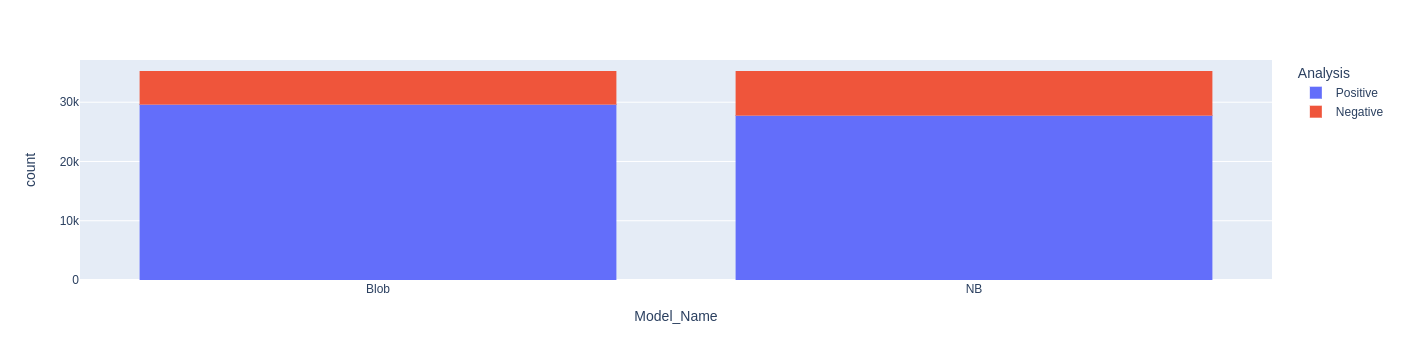

In [101]:
fig = px.histogram(df_1, x="Model_Name", color="Analysis")
fig.show()

From the plot we can conclude that in the NB model the number of positve tweets is less than the TextBlob model.

In [103]:
df_1['Date_new'] =  pd.to_datetime(df_1['Date']) #converted to datetime format
df_1.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                Cleaned tweetcaption  Blob_Subjectivity  \
0    Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1    Best Camera Smartphone k Please vote help re...           0.445174   
2    shree problem people problem Stupid Communis...           0.638750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4    stand Sunita Yadav Stop Transfer woman empow...           0.515079   

   Blob_Polarity Blob Analysis NB Analysis Model_Name  Analysis   Date_new  
0       0.142695      Positive    Positive       Blob  Positive 2020-07-14  
1       0.200033      Positive    Positive       Blob  Positive 2020-07-14  
2       0.118750      Positive    Positive       Blob  Positive 2020-07-14  
3       0.142857      Positive    Negative       Blob  Positive 2020-07-14  
4       0.213228      Positive    Positive       Blob  Positive 2020-07-14

In [104]:
df_1['month'] =df_1['Date_new'].dt.strftime('%b') #adding a column with month name
df_1.head()

Data       Date     Time  \
0                 tuesdayvibes  7/14/2020  7:00:21   
1                    realmeC11  7/14/2020  7:00:21   
2                  KPSharmaOli  7/14/2020  7:00:21   
3              RheaChakraborty  7/14/2020  7:00:21   
4   Stop_Transfer_Sunita_Yadav  7/14/2020  7:00:21   

                                        tweetcaption  \
0  Love it here vacation vibes amazing beautiful ...   
1  Best Camera Smartphone under 20k Please vote a...   
2  shree Why should we have a problem with the pe...   
3  Rhea Chakraborty s Heartbreaking Post On Susha...   
4  We stand for Sunita Yadav Stop the Transfer Wh...   

                                Cleaned tweetcaption  Blob_Subjectivity  \
0    Love vacation vibe amaze beautiful cabo mexi...           0.478571   
1    Best Camera Smartphone k Please vote help re...           0.445174   
2    shree problem people problem Stupid Communis...           0.638750   
3    Rhea Chakraborty Heartbreaking Post Sushant ...           0.607143   
4    stand Sunita Yadav Stop Transfer woman empow...           0.515079   

   Blob_Polarity Blob Analysis NB Analysis Model_Name  Analysis   Date_new  \
0       0.142695      Positive    Positive       Blob  Positive 2020-07-14   
1       0.200033      Positive    Positive       Blob  Positive 2020-07-14   
2       0.118750      Positive    Positive       Blob  Positive 2020-07-14   
3       0.142857      Positive    Negative       Blob  Positive 2020-07-14   
4       0.213228      Positive    Positive       Blob  Positive 2020-07-14   

  month  
0   Jul  
1   Jul  
2   Jul  
3   Jul  
4   Jul

#### Plot 2

This plot shows the number of positive and neagtive tweets for every month using the TextBlob Analysis.

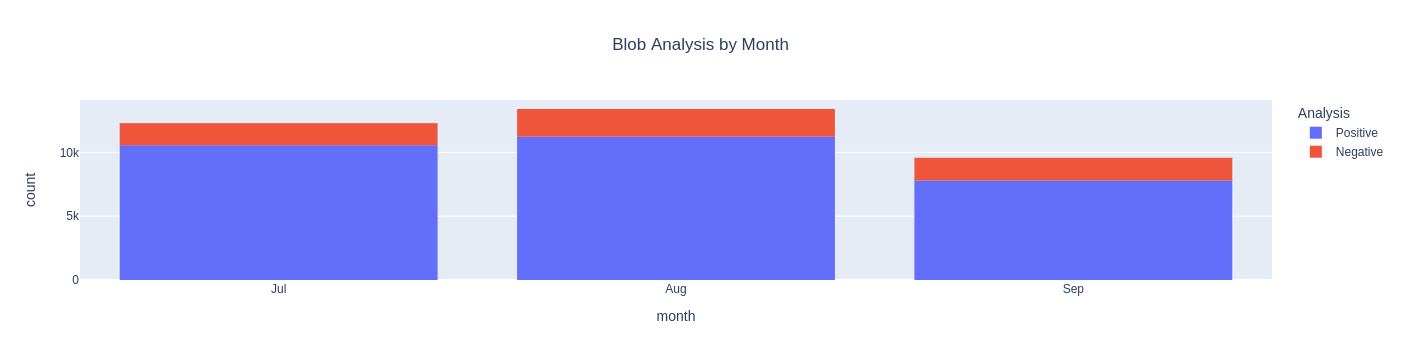

In [105]:
fig_1= px.histogram(df_1[0:35266], x="month", color="Analysis",title = 'Blob Analysis by Month')
fig_1.update_layout(title_x = 0.5)
fig_1.show()

We can see that the month of August has the highest number of tweets but the ratio of positive to negative tweets remains approximately costant in each month.

#### Plot 3

This plot shows the number of positive and neagtive tweets for every month using the Naive Bayes classifier.

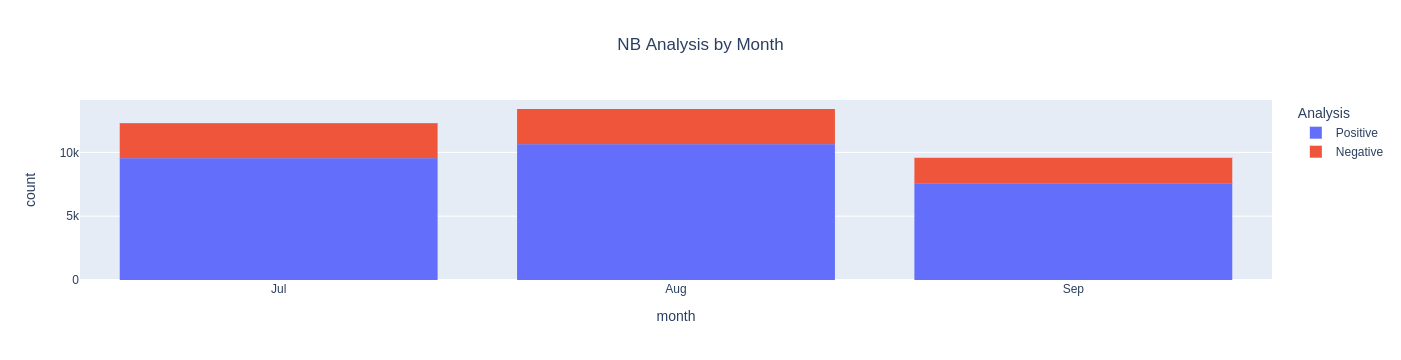

In [106]:
fig_2= px.histogram(df_1[35266:], x="month", color="Analysis",title = 'NB Analysis by Month')
fig_2.update_layout(title_x = 0.5)
fig_2.show()


We can see that the month of August has the highest number of tweets but the ratio of positive to negative tweets remains approximately costant in each month for the Naive Bayes model also.


#### Plot 4

I have modified the data frame for plot 4. I have added Time_new column in which time is sorted and also added tweet length column.

In [115]:
df_2=fin_data.copy()

In [116]:
df_2['Time_new'] = pd.to_datetime(df_2['Time'],format='%H:%M:%S').dt.time

In [118]:
df_2=df_2.sort_values(by='Time_new')
df_2

Data      Date      Time  \
14136       SushantCoverup  8/4/2020   0:00:01   
30780                hstdv  9/8/2020   0:00:01   
30779             COVIDー19  9/8/2020   0:00:01   
30778             Djokovic  9/8/2020   0:00:01   
30777                 DRDO  9/8/2020   0:00:01   
...                    ...       ...       ...   
13493           BoycottIPL  8/2/2020  23:59:59   
13492   HappyRakshaBandhan  8/2/2020  23:59:59   
13522                askRo  8/2/2020  23:59:59   
13506        justiceforssr  8/2/2020  23:59:59   
13521          sundayvibes  8/2/2020  23:59:59   

                                            tweetcaption  \
14136  youtu be LsdR1fhsNIE What a gem What a confide...   
30780  BrahMos II which is a joint Indian Russia proj...   
30779  Pic s of the day 151 COVID 19 To better times ...   
30778  Regardless of what side you fall on on whether...   
30777  India Right,India Mach fucking 6,India I wish ...   
...                                                  ...   
13493  BoycottIPL BoycottIPL Jb Tiktokers sacrifice k...   
13492  HappyRakshaBandhan I am glad to receive the mo...   
13522  askRo what is your favourite habbit,askRo whic...   
13506  jUstice for Disha Justice for Sushant Justice ...   
13521  Filter or not my natural beauty is irresistibl...   

                                    Cleaned tweetcaption  Blob_Subjectivity  \
14136    youtu LsdR fhsNIE gem confidence Amazing CBI...           0.521429   
30780    BrahMos II joint Indian Russia project appea...           0.608250   
30779    Pic day COVID good time one year ago exactly...           0.429487   
30778    Regardless side fall whether disqualify hand...           0.525000   
30777    India Right India Mach fuck India wish whole...           0.553968   
...                                                  ...                ...   
13493    BoycottIPL BoycottIPL Jb Tiktokers sacrifice...           0.255263   
13492    HappyRakshaBandhan glad receive precious gif...           0.732967   
13522    askRo favourite habbit askRo ur best Paryner...           0.333333   
13506    jUstice Disha Justice Sushant Justice humani...           0.534829   
13521    Filter natural beauty irresistible Get lose ...           0.620540   

       Blob_Polarity Blob Analysis NB Analysis  Time_new  
14136       0.189610      Positive    Positive  00:00:01  
30780       0.144250      Positive    Positive  00:00:01  
30779       0.062821      Positive    Positive  00:00:01  
30778       0.244602      Positive    Positive  00:00:01  
30777       0.259524      Positive    Negative  00:00:01  
...              ...           ...         ...       ...  
13493       0.063158      Positive    Positive  23:59:59  
13492       0.569780      Positive    Positive  23:59:59  
13522       0.666667      Positive    Positive  23:59:59  
13506       0.044864      Positive    Positive  23:59:59  
13521       0.330109      Positive    Positive  23:59:59  

[35266 rows x 10 columns]

In [119]:
df_2['tweet_length']=df_2['Cleaned tweetcaption'].apply(lambda x: len(x))
df_2.head()

Data      Date     Time  \
14136   SushantCoverup  8/4/2020  0:00:01   
30780            hstdv  9/8/2020  0:00:01   
30779         COVIDー19  9/8/2020  0:00:01   
30778         Djokovic  9/8/2020  0:00:01   
30777             DRDO  9/8/2020  0:00:01   

                                            tweetcaption  \
14136  youtu be LsdR1fhsNIE What a gem What a confide...   
30780  BrahMos II which is a joint Indian Russia proj...   
30779  Pic s of the day 151 COVID 19 To better times ...   
30778  Regardless of what side you fall on on whether...   
30777  India Right,India Mach fucking 6,India I wish ...   

                                    Cleaned tweetcaption  Blob_Subjectivity  \
14136    youtu LsdR fhsNIE gem confidence Amazing CBI...           0.521429   
30780    BrahMos II joint Indian Russia project appea...           0.608250   
30779    Pic day COVID good time one year ago exactly...           0.429487   
30778    Regardless side fall whether disqualify hand...           0.525000   
30777    India Right India Mach fuck India wish whole...           0.553968   

       Blob_Polarity Blob Analysis NB Analysis  Time_new  tweet_length  
14136       0.189610      Positive    Positive  00:00:01          1570  
30780       0.144250      Positive    Positive  00:00:01          1857  
30779       0.062821      Positive    Positive  00:00:01           909  
30778       0.244602      Positive    Positive  00:00:01           758  
30777       0.259524      Positive    Negative  00:00:01           569

This is the plot for time vs tweet length.

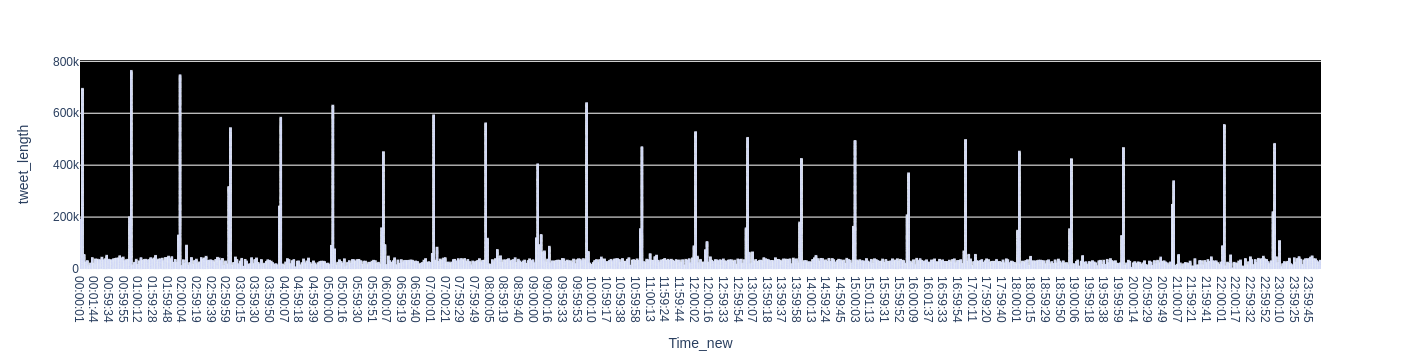

In [128]:
fig_4= px.bar(df_2, x='Time_new', y='tweet_length')
fig_4.update_layout({'plot_bgcolor':'rgba(0,0,0,1)'})
fig_4.show()

This is the end of my notebook and I learnt a lot in application of different models in part 1 and for plotting graphs I also came to know about plotly which is a great tool for plotting interactive graphs. We can zoom into the graphs and display a part of the graph according to our need. I had a great time doing all these things :)